## STEP 1 : E-91 Key Generation

In [8]:
pip install qiskit-aer

  Using cached rustworkx-0.16.0-cp39-abi3-win_amd64.whl.metadata (10 kB)
Using cached rustworkx-0.16.0-cp39-abi3-win_amd64.whl (2.0 MB)
  Attempting uninstall: rustworkx
    Found existing installation: rustworkx 0.14.1
    Uninstalling rustworkx-0.14.1:
      Successfully uninstalled rustworkx-0.14.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
print(sys.executable)

c:\Users\USER\anaconda3\envs\qiskit-stable\python.exe


In [10]:
!pip install qiskit


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import qiskit
import networkx
import matplotlib

print("✅ Qiskit Version:", qiskit.__version__)
print("✅ NetworkX Version:", networkx.__version__)
print("✅ Matplotlib Version:", matplotlib.__version__)

✅ Qiskit Version: 2.0.0
✅ NetworkX Version: 2.8.8
✅ Matplotlib Version: 3.10.1


In [4]:
execution_times = {}  # 🕒 This will store the time for each step

Running E91 protocol on [local simulator]

E91 Protocol Results:
-------------------------------------------------------------------------------------------------------------------------------------------
Alice's outcomes: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
Bob's outcomes:   [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0

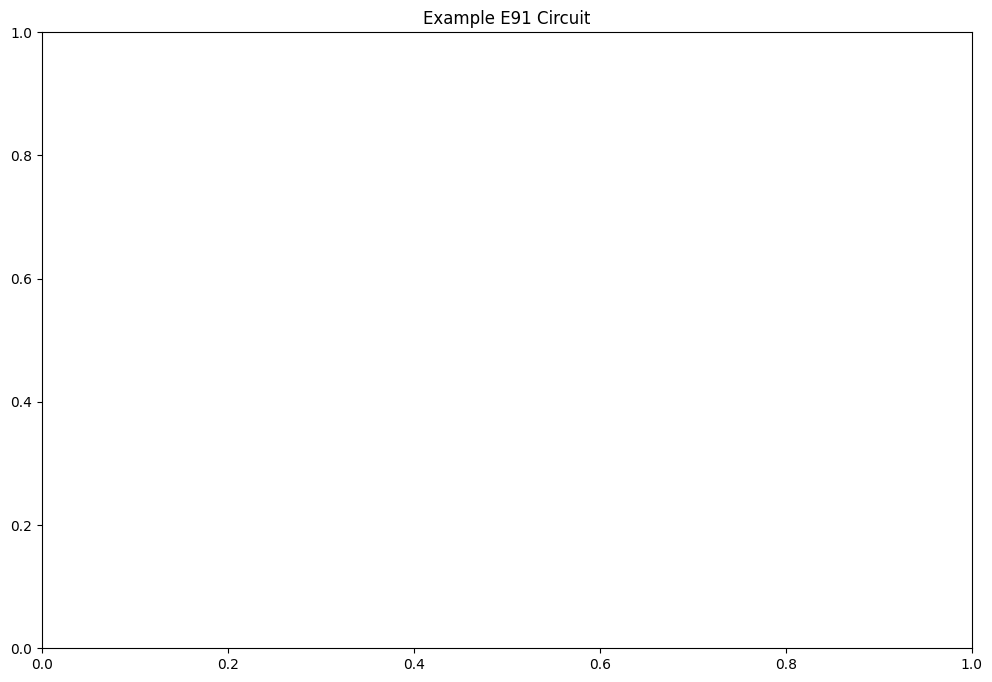

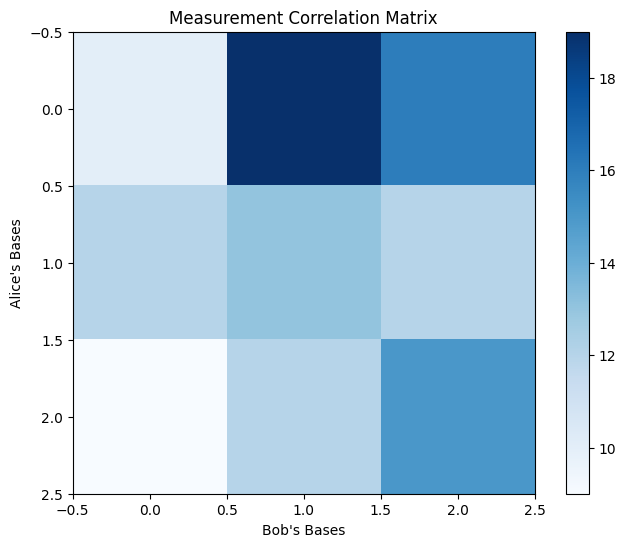

STEP 1 : E-91 Key Generation took 15.2539 seconds


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import circuit_drawer as cd  
from qiskit_aer import AerSimulator
import time

start = time.time()
# One-Time Pad Encryption 
def bits_to_bytes(bits):
    # list of bit to bytes (8 bits per byte)
    n = len(bits) - (len(bits) % 8)
    bytes_list = []
    for i in range(0, n, 8):
        byte_str = ''.join(str(b) for b in bits[i:i+8])
        bytes_list.append(int(byte_str, 2))
    return bytes(bytes_list)

def xor_bytes(data, pad):
    # Elementwise XOR 
    return bytes(a ^ b for a, b in zip(data, pad))

def one_time_pad_encrypt(message, key_bits):
    # Encrypt 
    msg_bytes = message.encode('utf-8')
    key_bytes = bits_to_bytes(key_bits)
    if len(key_bytes) < len(msg_bytes):
        raise ValueError("Not enough key bits to encrypt the message.")
    pad = key_bytes[:len(msg_bytes)]
    return xor_bytes(msg_bytes, pad)

def one_time_pad_decrypt(encrypted, key_bits):
    # Decrypt 
    key_bytes = bits_to_bytes(key_bits)
    pad = key_bytes[:len(encrypted)]
    decrypted = xor_bytes(encrypted, pad)
    return decrypted.decode('utf-8')


# E91 Protocol  
class EnhancedE91Protocol:
    def __init__(self, num_pairs=100):
        self.num_pairs = num_pairs

        # Possible measurement bases 
        # (angles in radians) 
        self.alice_angles = [0, np.pi/8, np.pi/4]
        self.bob_angles   = [-np.pi/8, 0, np.pi/8]

        # Fixed measurement angle (Eve)
        self.eve_angle = np.pi/4

        # CHSH threshold
        # Bell violation gives S > 2
        self.error_threshold = 2

    # Circuit 
    def create_entangled_circuit(self, include_eve=True):
        num_qubits = 3 if include_eve else 2
        qr = QuantumRegister(num_qubits, 'q')    # alice(q[0]), bob(q[1]), eve(q[2])
        cr = ClassicalRegister(num_qubits, 'c')  # classical bit = hold measurements
        qc = QuantumCircuit(qr, cr)
        
        # Bell state on qubits
        qc.h(qr[0])
        qc.cx(qr[0], qr[1]) # 0 (Alice), 1 (Bob)
        if include_eve:
            qc.cx(qr[1], qr[2])
        return qc

    # Measurement basis
    def apply_measurement_rotations(self, qc, alice_basis, bob_basis, include_eve=True):

        # Rotate & measure Alice's qubit
        qc.ry(-2 * self.alice_angles[alice_basis], 0)

        # Rotate and measure Bob's qubit
        qc.ry(-2 * self.bob_angles[bob_basis], 1)
        if include_eve:
            qc.ry(-2 * self.eve_angle, 2)

        # all qubits measured
        qc.measure(list(range(qc.num_clbits)), list(range(qc.num_clbits))) 
        return qc

    def calculate_CHSH_parameter(self, results):
        correlations = {(a, b): 0 for a in range(3) for b in range(3)}
        counts = {(a, b): 0 for a in range(3) for b in range(3)}
        for i in range(len(results['alice_bases'])):
            a_base = results['alice_bases'][i]
            b_base = results['bob_bases'][i]

            # map outcome 0 -> +1 and outcome 1 -> -1
            a_val = 1 if results['alice_results'][i] == 0 else -1
            b_val = 1 if results['bob_results'][i] == 0 else -1
            correlations[(a_base, b_base)] += a_val * b_val
            counts[(a_base, b_base)] += 1
        for key in correlations:
            if counts[key] > 0:
                correlations[key] /= counts[key]
        S = abs(correlations[(0, 0)] - correlations[(0, 2)] +
                correlations[(2, 0)] + correlations[(2, 2)])
        return S

    def run_protocol(self, include_eve=True, backend=None):
        results = {
            'alice_bases': [],
            'bob_bases': [],
            'alice_results': [],
            'bob_results': [],
            'eve_results': [] if include_eve else None,
            'circuits': []
        }

        num_bits = 3 if include_eve else 2
        
        for _ in range(self.num_pairs):
            alice_basis = np.random.choice([0, 1, 2])
            bob_basis = np.random.choice([0, 1, 2])
            results['alice_bases'].append(alice_basis)
            results['bob_bases'].append(bob_basis)
            
            qc = self.create_entangled_circuit(include_eve=include_eve)
            qc = self.apply_measurement_rotations(qc, alice_basis, bob_basis, include_eve=include_eve)
            results['circuits'].append(qc.copy())
            
            # Transpile for backend
            compiled_qc = transpile(qc, backend)

            # Run one shot
            job = backend.run(compiled_qc, shots=1)
            result_obj = job.result()

            # Measurement 
            counts = result_obj.get_counts(compiled_qc)
            if not counts or len(counts) == 0:
                raise ValueError("No counts returned from the simulator.")
            
            # Bit strings in little-endian order
            outcome = list(counts.keys())[0].replace(" ", "")
            if len(outcome) < num_bits:
                outcome = outcome.zfill(num_bits)

            # Reverse to assign 
            # index 0 -> Alice, 1 -> Bob, (2 -> Eve if present)
            outcome = outcome[::-1]
            results['alice_results'].append(int(outcome[0]))
            results['bob_results'].append(int(outcome[1]))
            if include_eve:
                results['eve_results'].append(int(outcome[2]))
        
        results['S_parameter'] = self.calculate_CHSH_parameter(results)
        return results

    # Extract the secure key
    def generate_secure_key(self, results):
        key = []
        for i in range(self.num_pairs):
            if results['alice_bases'][i] == results['bob_bases'][i]:
                key.append(results['alice_results'][i])
        return key

    def visualize_results(self, results):

        # Visualize first circuit
        if results['circuits']:
            plt.figure(figsize=(12, 8))
            try:
                cd(results['circuits'][0], output='mpl', style='iqp-dark')
            except Exception as e:
                print("❌ Circuit drawing failed due to version conflict:", e)
            plt.title("Example E91 Circuit")

        # Correlation matrix
        correlations = np.zeros((3, 3))
        for i in range(len(results['alice_bases'])):
            a_base = results['alice_bases'][i]
            b_base = results['bob_bases'][i]
            if results['alice_results'][i] == results['bob_results'][i]:
                correlations[a_base, b_base] += 1

        plt.figure(figsize=(8, 6))
        plt.imshow(correlations, cmap='Blues')
        plt.colorbar()
        plt.title("Measurement Correlation Matrix")
        plt.xlabel("Bob's Bases")
        plt.ylabel("Alice's Bases")
        return plt



if __name__ == "__main__":
    # Local simulator
    backend = AerSimulator()

    print("Running E91 protocol on [local simulator]")
    # Increase num_pairs = longer secure key
    protocol = EnhancedE91Protocol(num_pairs=150)
    results = protocol.run_protocol(include_eve=True, backend=backend)
    
    # Generate secure keys
    alice_key = protocol.generate_secure_key(results)
    bob_key = protocol.generate_secure_key(results)
    
    # QBER on sifted key
    if alice_key and bob_key:
        errors = sum(1 for a, b in zip(alice_key, bob_key) if a != b)
        qber = errors / len(alice_key)
    else:
        qber = None

    print("\nE91 Protocol Results:")
    print("-------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Alice's outcomes: {results['alice_results']}")
    print(f"Bob's outcomes:   {results['bob_results']}")
    print(f"Eve's outcomes:   {results['eve_results']}")
    print(f"Alice's bases:    {results['alice_bases']}")
    print(f"Bob's bases:      {results['bob_bases']}")
    print(f"CHSH Parameter S: {results['S_parameter']:.3f}")
    print(f"Secure key (Alice): {alice_key}")
    print(f"Secure key (Bob):   {bob_key}")
    if qber is not None:
        if qber == 0:
            print("\nSuccess: Keys match perfectly! (QBER: 0%)")
        else:
            print(f"\nWarning: Keys do not match perfectly. QBER: {qber * 100:.2f}%")
    else:
        print("\nNo secure key was generated.")
    
    # Secret Message 
    secret_message = "HELLO"

    # Secure key length may be short as only rounds with matching bases are kept
    # Increase num_pairs = longer key
    if len(alice_key) < len(secret_message) * 8:
        print("\nSecure key is too short to encrypt the secret message.")
    else:
        try:
            encrypted_msg = one_time_pad_encrypt(secret_message, alice_key)
            decrypted_msg = one_time_pad_decrypt(encrypted_msg, bob_key)
            print("\nSecret Message Transmission:")
            print(f"Original Message: {secret_message}")
            print(f"Encrypted (bytes): {encrypted_msg}")
            print(f"Decrypted Message: {decrypted_msg}")
            if secret_message == decrypted_msg:
                print("\nSuccess: The secret message was transmitted securely!")
            else:
                print("\nError: Decrypted message does not match the original.")
        except Exception as ex:
            print(f"\nEncryption error: {str(ex)}")
    

    try:
        plt = protocol.visualize_results(results)
        plt.show()
    except Exception as e:
        print("⚠️ Circuit drawing failed:", e)

end = time.time()
duration = end - start

step_name = "STEP 1 : E-91 Key Generation" 
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")

## STEP 2: Salt Hashing and Expansion of E91 Key

To prevent deterministic key reuse and to expand the variable-length E91-generated key into a fixed-length cryptographically strong key, we apply salted SHA-256 hashing. 

This step:
- Converts the binary key into a fixed-length (256-bit) digest
- Adds entropy through a random salt
- Enables verification (Alice sends hash and salt, Bob verifies post-decryption)

In [6]:
import hashlib
import os
import time
# STEP 2 - Salted Hashing of E91 Key and Verification
start = time.time()
def salted_sha256_hash(key_bits, salt=None):
    """
    Hash the binary E91 key using SHA-256 with optional salt (for verification).
    Returns (salt, hash_digest)
    """
    # Convert bits to bytes
    key_bytes = bits_to_bytes(key_bits)
    
    # Generate a random salt if not provided (32 bytes = 256 bits)
    if salt is None:
        salt = os.urandom(32)
    
    # Hash with salt
    hasher = hashlib.sha256()
    hasher.update(salt + key_bytes)
    hashed_key = hasher.digest()
    
    return salt, hashed_key


def verify_hashed_key(received_hash, received_salt, key_bits):
    """
    Verifies that a given salted hash matches the re-computed hash from the key.
    Returns True if match, else False.
    """
    _, recomputed_hash = salted_sha256_hash(key_bits, salt=received_salt)
    return received_hash == recomputed_hash


# --- Apply Step 2 on Alice's key ---

salt, hashed_key = salted_sha256_hash(alice_key)

# Simulate Bob receiving Alice's key bits and salt later for verification
verification_result = verify_hashed_key(hashed_key, salt, bob_key)

# Print the result
print("🔐 Salted Key Hash Verification")
print("------------------------------------------------------")
print("Alice sends salt       :", salt.hex())
print("Alice sends hash       :", hashed_key.hex())
if verification_result:
    print("✅ Key verification passed. No tampering or noise detected.")
else:
    print("❌ Key verification failed. Key mismatch or attack!")

end = time.time()
duration = end - start

step_name = "STEP 2: Salt Hashing and Expansion of E91 Key" 
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")

🔐 Salted Key Hash Verification
------------------------------------------------------
Alice sends salt       : ba2a212cbdcd068065409c76a5f681e99df9b9da18127eca083aa408d5184b9d
Alice sends hash       : 71a2f700c174d6ef827da4e7a482d3d551e5bfdb218cfe2430622b846cbdd3e4
✅ Key verification passed. No tampering or noise detected.
STEP 2: Salt Hashing and Expansion of E91 Key took 0.0039 seconds


## ✅ Step 3: Kyber Key Generation + Encryption of Salt-Hashed E91 Key
(Using PyryL's Kyber implementation)

In this step, we used the PyryL GitHub implementation of Kyber instead of pqcrypto to avoid compatibility issues with Python 3.12.2 and Windows. This library provides a clean interface for Kyber KEM operations using Python and Numpy.

What we did in this step:

Generated a public-private key pair using the Kyber module.

Encrypted the salted SHA-256 hashed key (from Step 2) using the public key.

Decrypted it using the private key.

Verified that the decrypted key matched the original hashed key for integrity.

Outcome: ✅ Decryption was successful, confirming that the hashed key was securely transmitted using Kyber.

In [7]:
from kyber.encryption.keygen import generate_keys
from kyber.encryption.encrypt import Encrypt
from kyber.encryption.decrypt import decrypt
import time

start = time.time()
def encrypt_and_decrypt_hashed_key_with_kyber(hashed_key: bytes) -> bool:
    """
    Step 3: Encrypts a hashed key using Kyber (PyryL implementation) and verifies decryption.
    """
    print("\n🔐 STEP 3: Encrypting Salted Hashed Key using Kyber")

    # Generate keypair
    private_key, public_key = generate_keys()
    print(f"📬 Public Key (preview): {public_key[:10].hex()}...")
    print(f"🔑 Private Key (preview): {private_key[:10].hex()}...")

    # Encrypt hashed key
    encryptor = Encrypt(public_key, m=hashed_key_bytes)
    ciphertext = encryptor.encrypt()
    print(f"🧊 Ciphertext (preview): {ciphertext[:10].hex()}...")

    # Decrypt
    decrypted_key = decrypt(private_key, ciphertext)

    # Validate
    if decrypted_key == hashed_key_bytes:
        print("✅ Decryption Success: Hashed key securely transmitted using Kyber.")
        return True
    else:
        print("❌ Decryption Failed: Mismatch in original and decrypted key.")
        return False
hashed_key_bytes = hashed_key  # or use `hashed_key = hashed_key` if that's your actual variable
print(encrypt_and_decrypt_hashed_key_with_kyber(hashed_key))

end = time.time()
duration = end - start

step_name = "Step 3: Kyber Key Generation + Encryption of Salt-Hashed E91 Key"  
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")


🔐 STEP 3: Encrypting Salted Hashed Key using Kyber
📬 Public Key (preview): b06d24acc4690e9db956...
🔑 Private Key (preview): 80040080000000b00b00...
🧊 Ciphertext (preview): 374b210d9b1658217ae7...
✅ Decryption Success: Hashed key securely transmitted using Kyber.
True
Step 3: Kyber Key Generation + Encryption of Salt-Hashed E91 Key took 0.5235 seconds


## 🔐 Step 4: AES File Encryption using the Decrypted Hashed Key
(Symmetric encryption of actual data using the shared key)

In this step, we use the decrypted hashed key from Step 3 as a symmetric key to encrypt a file or string using the AES-GCM mode (Galois/Counter Mode) for authenticated encryption.

Goals:

Use the hashed key as an AES-256 key.

Encrypt sensitive content (file/message) using AES.

Support decryption and verification using the same key.

Ensure integrity using authenticated encryption (via AES-GCM).

In [8]:
# STEP 4 – AES Encryption & Decryption using the shared hashed key (from Step 3)
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os
import time

start = time.time()
def aes_encrypt_decrypt_message(shared_key: bytes, message: str):
    """
    Encrypts and decrypts a message using AES-GCM with the shared key.
    """
    print("\n🔐 STEP 4: AES-GCM Encryption & Decryption of Message")

    # Ensure the shared key is 32 bytes for AES-256
    key_32 = shared_key[:32]

    # Generate a 12-byte IV (nonce)
    iv = os.urandom(12)
    print(f"🧩 IV (nonce): {iv.hex()}")

    # Convert the plaintext message to bytes
    plaintext_bytes = message.encode()

    # AES-GCM Encryption
    encryptor = Cipher(
        algorithms.AES(key_32),
        modes.GCM(iv),
        backend=default_backend()
    ).encryptor()

    ciphertext = encryptor.update(plaintext_bytes) + encryptor.finalize()
    tag = encryptor.tag

    print(f"🔒 Ciphertext: {ciphertext.hex()}")
    print(f"🛡️ Auth Tag: {tag.hex()}")

    # AES-GCM Decryption
    decryptor = Cipher(
        algorithms.AES(key_32),
        modes.GCM(iv, tag),
        backend=default_backend()
    ).decryptor()

    decrypted_bytes = decryptor.update(ciphertext) + decryptor.finalize()
    decrypted_message = decrypted_bytes.decode()

    print(f"✅ Decrypted Message: {decrypted_message}")

    # Validation
    return decrypted_message == message

# Run the function with a message
test_message = "TOP SECRET: E91 + Kyber = 🔐"
aes_encrypt_decrypt_message(hashed_key, test_message)

end = time.time()
duration = end - start

step_name = "Step 4: AES File Encryption using the Decrypted Hashed Key"  
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")


🔐 STEP 4: AES-GCM Encryption & Decryption of Message
🧩 IV (nonce): f0a6c9d699d89ae5f7cac358
🔒 Ciphertext: a5ed0f61f8c5d8fc85828ac273cbed73e243358a11dc34e434c8fe46f4a5
🛡️ Auth Tag: bd6a00dfb90408da4a80a7e72aef5536
✅ Decrypted Message: TOP SECRET: E91 + Kyber = 🔐
Step 4: AES File Encryption using the Decrypted Hashed Key took 0.0309 seconds


### 🔐 STEP 5: AES-GCM Encryption of File using Salted E91 Key (Alice’s Side)

In this step, Alice uses the salted SHA-256 hashed E91 key (from Step 2) to encrypt a sensitive file using AES-GCM (Galois/Counter Mode). This ensures both confidentiality and integrity of the file before it's uploaded to the cloud.

- **Input**: A plaintext file (e.g., PDF, TXT).
- **Key**: Salt-hashed E91 key (from Step 2).
- **Encryption**: AES-GCM, which uses:
  - `iv` (Initialization Vector / nonce)
  - `ciphertext`
  - `auth_tag` (for tamper detection)
- **Output**: Encrypted file + metadata (iv, tag) saved securely.

This prepares the file for cloud upload and enables later re-encryption by a proxy server using a second AES key derived from a proxy key (Step 6).

In [10]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import os
import time

start = time.time()
def encrypt_file_with_aes_gcm(filepath: str, hashed_key: bytes):
    """
    Encrypts a file using AES-GCM with the hashed E91 key.
    
    Args:
        filepath (str): Path to the plaintext file.
        hashed_key (bytes): Salted hashed E91 key from Step 2.
    Returns:
        dict: Dictionary containing iv, ciphertext, and auth tag.
    """
    # Generate AES-GCM cipher
    iv = get_random_bytes(12)  # 96-bit nonce
    cipher = AES.new(hashed_key, AES.MODE_GCM, nonce=iv)
    
    # Read plaintext file
    with open(filepath, 'rb') as f:
        plaintext = f.read()
    
    # Encrypt file content
    ciphertext, tag = cipher.encrypt_and_digest(plaintext)
    
    # Save encrypted data to a new file
    enc_path = filepath + '.enc'
    with open(enc_path, 'wb') as ef:
        ef.write(iv + tag + ciphertext)
    
    print("🔒 File encrypted successfully and saved as:", enc_path)
    print(f"🟡 IV (nonce): {iv.hex()}")
    print(f"🟣 Auth Tag: {tag.hex()}")
    print(f"🧱 Ciphertext (preview): {ciphertext[:16].hex()}...")

    return {
        'iv': iv,
        'tag': tag,
        'ciphertext': ciphertext,
        'enc_path': enc_path
    }

# Example Usage
test_file = "test_secret.txt"

# Create a dummy file to test (run only once)
with open(test_file, 'w') as f:
    f.write("This is a confidential file encrypted using AES-GCM and QKD E91.")

# Run encryption
encrypted_file_info = encrypt_file_with_aes_gcm(test_file, hashed_key)

end = time.time()
duration = end - start

step_name = "STEP 5: AES-GCM Encryption of File using Salted E91 Key (Alice’s Side)"  
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")

🔒 File encrypted successfully and saved as: test_secret.txt.enc
🟡 IV (nonce): 1906907a66dfcdd8419a54d7
🟣 Auth Tag: 7e06a1d90865e650fb8f1800d31aa04c
🧱 Ciphertext (preview): abcc8287e1d642e34264c18a62564ff7...
STEP 5: AES-GCM Encryption of File using Salted E91 Key (Alice’s Side) took 0.0029 seconds


### 🔁 STEP 6: Re-Encryption of AES-Encrypted File using Proxy Key (Cloud's Role)

In this step, the cloud server receives the AES-encrypted file from Alice and re-encrypts it using another AES-GCM layer — this time with a **Proxy Key** derived from a specific permutation of the original E91 key. This step ensures that only someone with the **Proxy Key** (e.g., Bob) can decrypt the re-encrypted version.

- This step mimics secure proxy re-encryption in classical cryptography.
- Bob will later decrypt the outer AES layer using the Proxy Key, and then the inner layer using the original salted E91 key.

**Input**:
- AES-GCM encrypted file (Step 5 output).
- Proxy key (can be generated from E91 key permutation).

**Output**:
- Doubly encrypted file (`.enc2` extension).

In [11]:
import time

start = time.time()
def re_encrypt_file_with_proxy_key(input_path: str, proxy_key: bytes):
    """
    Re-encrypts an already AES-GCM encrypted file using a second AES-GCM layer with a proxy key.
    
    Args:
        input_path (str): Path to the file encrypted in Step 5.
        proxy_key (bytes): A second AES key derived from E91 for proxy encryption.
    Returns:
        str: Path to the doubly encrypted file.
    """
    # Read Step 5 encrypted content
    with open(input_path, 'rb') as ef:
        original_encrypted_data = ef.read()

    # AES-GCM re-encryption with proxy key
    iv2 = get_random_bytes(12)
    cipher2 = AES.new(proxy_key, AES.MODE_GCM, nonce=iv2)
    ciphertext2, tag2 = cipher2.encrypt_and_digest(original_encrypted_data)

    re_enc_path = input_path + '.enc2'
    with open(re_enc_path, 'wb') as f:
        f.write(iv2 + tag2 + ciphertext2)

    print("🔁 Re-encrypted file saved as:", re_enc_path)
    print(f"📘 New IV: {iv2.hex()}")
    print(f"📕 New Auth Tag: {tag2.hex()}")
    print(f"📦 Re-Ciphertext (preview): {ciphertext2[:16].hex()}...")

    return re_enc_path

proxy_key = hashed_key[::-1]  # Example: reversed bytes of hashed key (simulate permutation)

# Run re-encryption
re_encrypted_file = re_encrypt_file_with_proxy_key(encrypted_file_info['enc_path'], proxy_key)

end = time.time()
duration = end - start

step_name = "STEP 6: Re-Encryption of AES-Encrypted File using Proxy Key (Cloud's Role)"  
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")

🔁 Re-encrypted file saved as: test_secret.txt.enc.enc2
📘 New IV: 1bd2cec2e3c69ffa4f059ff1
📕 New Auth Tag: 184e8c17c236382326fee83c000d2ccd
📦 Re-Ciphertext (preview): c076d13d4621538dca7947caf898690a...
STEP 6: Re-Encryption of AES-Encrypted File using Proxy Key (Cloud's Role) took 0.0098 seconds


In [9]:
# For testing, we’ll derive a proxy key by modifying the original hashed key slightly
proxy_key = hashed_key[::-1]  # Example: reversed bytes of hashed key (simulate permutation)

# Run re-encryption
re_encrypted_file = re_encrypt_file_with_proxy_key(encrypted_file_info['enc_path'], proxy_key)

🔁 Re-encrypted file saved as: test_secret.txt.enc.enc2
📘 New IV: 40b45efbb089f6275eb2b354
📕 New Auth Tag: 70a1a9bc9f7f0bba2c81d3ddfeac7e3a
📦 Re-Ciphertext (preview): 4f1cfaf9396a79523fa7930af9f7143a...


### 🔓 **Step 7: Decryption of Re-encrypted File using Proxy Key (Bob’s Perspective)**

In this step, Bob uses the **proxy key** to decrypt the re-encrypted file obtained from the cloud. 
This simulates Bob receiving the proxy key securely from Alice. 
He decrypts the file to retrieve the version originally encrypted by Alice using the salted hashed key.

Then, in the final step, Bob will use the **salted hashed key** (from Step 2) to fully decrypt and read the message or file contents.

In [12]:
from Crypto.Cipher import AES
import time

start = time.time()
def decrypt_reencrypted_file_with_proxy_key(re_encrypted_path, proxy_key):
    """
    Decrypts the file that was re-encrypted using the proxy key (Bob's view).
    """
    with open(re_encrypted_path, 'rb') as f:
        iv2 = f.read(12)
        tag2 = f.read(16)
        ciphertext2 = f.read()

    cipher2 = AES.new(proxy_key, AES.MODE_GCM, nonce=iv2)
    original_encrypted_data = cipher2.decrypt_and_verify(ciphertext2, tag2)

    recovered_enc_file_path = re_encrypted_path.replace(".enc2", ".recovered.enc")
    with open(recovered_enc_file_path, 'wb') as f:
        f.write(original_encrypted_data)

    print("📥 Recovered AES-encrypted file saved as:", recovered_enc_file_path)
    return recovered_enc_file_path

# Example: Bob decrypts the file using the proxy key (from cloud)
recovered_enc_file_path = decrypt_reencrypted_file_with_proxy_key(re_encrypted_file, proxy_key)

end = time.time()
duration = end - start

step_name = "Step 7: Decryption of Re-encrypted File using Proxy Key (Bob’s Perspective)"  
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")

📥 Recovered AES-encrypted file saved as: test_secret.txt.enc.recovered.enc
Step 7: Decryption of Re-encrypted File using Proxy Key (Bob’s Perspective) took 0.0127 seconds


### 🔐 **Step 8: Final Decryption using Hashed E91 Key (Bob’s Perspective)**

In this final step, Bob uses the **salted hashed key** (previously verified from E91 QKD and salt hashing) to decrypt the AES-encrypted file he just recovered in Step 7.

This decryption reveals the **original message or file content** that Alice initially encrypted using AES-GCM. 
If the key was securely transmitted (via Kyber-PKE), and proxy re-encryption was properly handled, Bob should get the **exact file content** without any tampering or data loss.

In [13]:
from Crypto.Cipher import AES
import time

start = time.time()
def final_decrypt_with_hashed_key(encrypted_path, hashed_key):
    """
    Decrypts the original AES-encrypted file using the hashed E91 key.
    """
    with open(encrypted_path, 'rb') as f:
        iv = f.read(12)
        tag = f.read(16)
        ciphertext = f.read()

    cipher = AES.new(hashed_key, AES.MODE_GCM, nonce=iv)
    decrypted_data = cipher.decrypt_and_verify(ciphertext, tag)

    # Save the final decrypted content
    output_path = encrypted_path.replace(".recovered.enc", ".decrypted.txt")
    with open(output_path, 'wb') as f:
        f.write(decrypted_data)

    print("📂 Final Decryption Successful! File saved as:", output_path)
    return output_path

# 🧪 Bob decrypts using final hashed key (salted from Step 2)
final_output_file = final_decrypt_with_hashed_key(recovered_enc_file_path, hashed_key)

end = time.time()
duration = end - start

step_name = "Step 8: Final Decryption using Hashed E91 Key (Bob’s Perspective)"  
execution_times[step_name] = duration

print(f"{step_name} took {duration:.4f} seconds")

📂 Final Decryption Successful! File saved as: test_secret.txt.enc.decrypted.txt
Step 8: Final Decryption using Hashed E91 Key (Bob’s Perspective) took 0.0029 seconds


#### Visualization

In [14]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout, circuit_drawer
from matplotlib import pyplot as plt

# W observable (S → H → T → H → Measure)
def create_w_basis(index):
    qc = QuantumCircuit(2, 2)
    qc.s(index)
    qc.h(index)
    qc.t(index)
    qc.h(index)
    qc.measure(index, index)
    return qc

# X observable (H → Measure)
def create_x_basis(index):
    qc = QuantumCircuit(2, 2)
    qc.h(index)
    qc.measure(index, index)
    return qc

# Z observable (Measure only)
def create_z_basis(index):
    qc = QuantumCircuit(2, 2)
    qc.measure(index, index)
    return qc

# Create the 6 circuits
circuits = {
    "Alice - W Basis": create_w_basis(0),
    "Alice - X Basis": create_x_basis(0),
    "Alice - Z Basis": create_z_basis(0),
    "Bob - W Basis": create_w_basis(1),
    "Bob - X Basis": create_x_basis(1),
    "Bob - Z Basis": create_z_basis(1)
}

# Save circuits as images
for name, circuit in circuits.items():
    fig = circuit_drawer(circuit, output='mpl')
    fig.suptitle(name)
    fig.savefig(f"{name.replace(' ', '_').replace('-', '')}.png")


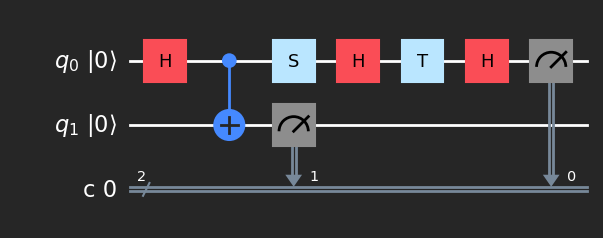

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import circuit_drawer

# Create registers
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr, name="E91-Dynamic")

# Step 1: Entangled photon pair (Bell State)
qc.h(qr[0])
qc.cx(qr[0], qr[1])

# Step 2: Alice's measurement in W basis (S → H → T → H)
qc.s(qr[0])
qc.h(qr[0])
qc.t(qr[0])
qc.h(qr[0])

# Step 3: Bob's measurement in Z basis (No gates for Z)
# If you'd like to try X or W basis, insert corresponding gates here

# Step 4: Measurement
qc.measure(qr, cr)

# Draw circuit
circuit_drawer(qc, output='mpl', style='iqp-dark', initial_state=True, cregbundle=True)

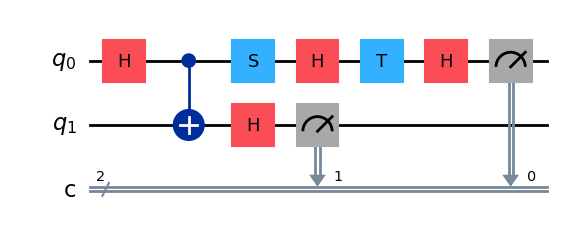

In [3]:
from qiskit import QuantumCircuit

def create_e91_measurement_circuit(alice_basis: str, bob_basis: str) -> QuantumCircuit:
    qc = QuantumCircuit(2, 2)

    # Step 1: Entangle q0 and q1
    qc.h(0)
    qc.cx(0, 1)

    # Step 2: Alice's basis transformation
    if alice_basis == 'W':
        qc.s(0)
        qc.h(0)
        qc.t(0)
        qc.h(0)
    elif alice_basis == 'X':
        qc.h(0)
    elif alice_basis == 'Z':
        pass  # No transformation

    # Step 3: Bob's basis transformation
    if bob_basis == 'W':
        qc.s(1)
        qc.h(1)
        qc.t(1)
        qc.h(1)
    elif bob_basis == 'X':
        qc.h(1)
    elif bob_basis == 'Z':
        pass

    # Step 4: Measurement
    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc

# Example usage:
qc = create_e91_measurement_circuit("W", "X")
qc.draw("mpl")  # or 'latex' if you have LaTeX support

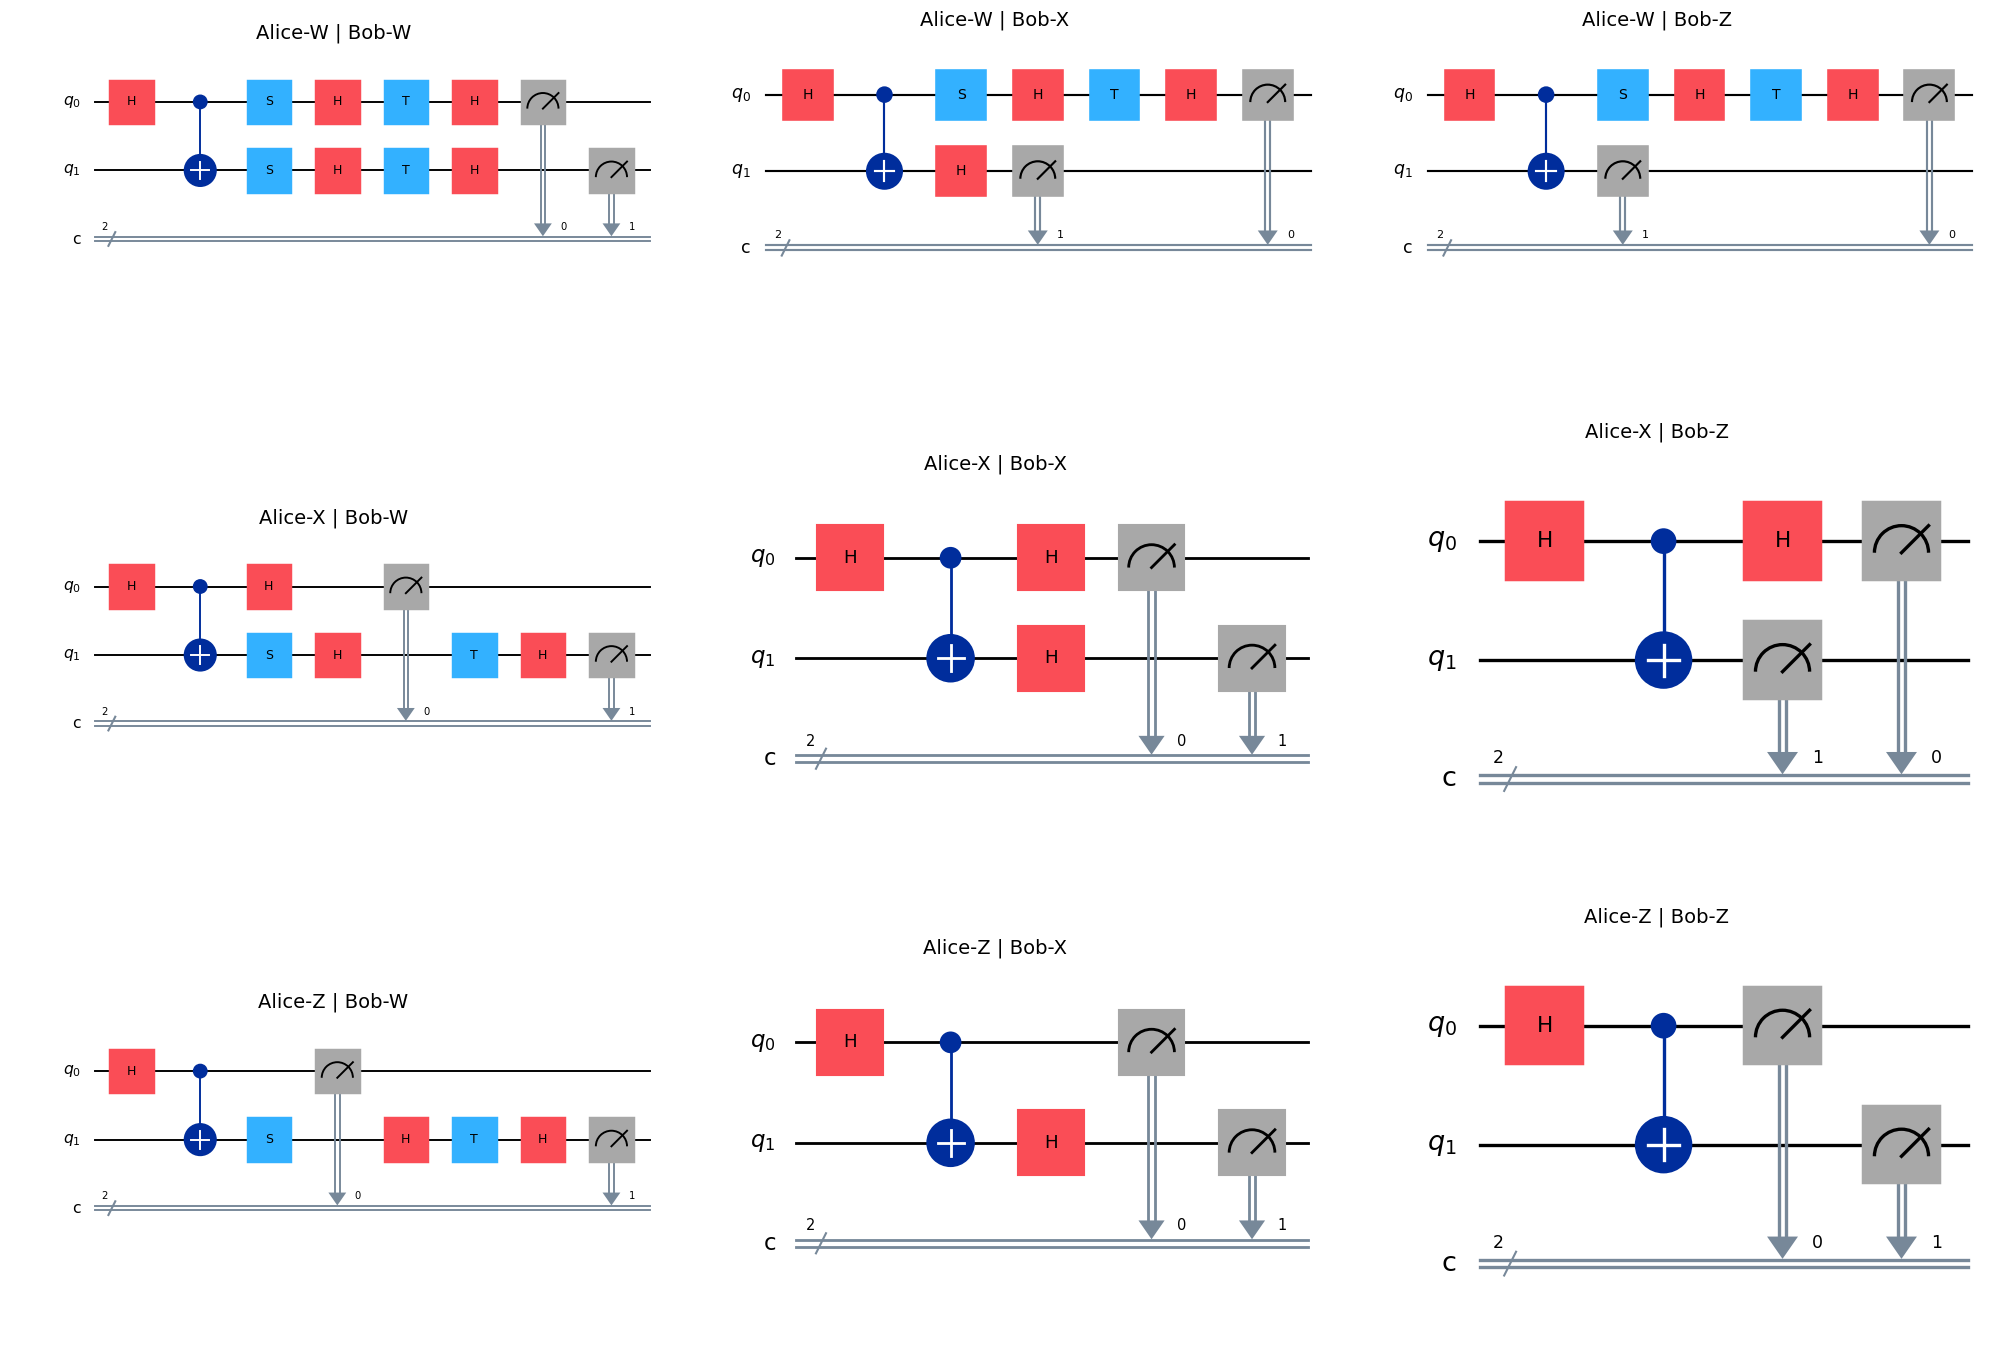

In [4]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

def create_e91_measurement_circuit(alice_basis: str, bob_basis: str) -> QuantumCircuit:
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)

    if alice_basis == 'W':
        qc.s(0)
        qc.h(0)
        qc.t(0)
        qc.h(0)
    elif alice_basis == 'X':
        qc.h(0)

    if bob_basis == 'W':
        qc.s(1)
        qc.h(1)
        qc.t(1)
        qc.h(1)
    elif bob_basis == 'X':
        qc.h(1)

    qc.measure(0, 0)
    qc.measure(1, 1)
    return qc

# Prepare all combinations
bases = ['W', 'X', 'Z']
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
for i, alice in enumerate(bases):
    for j, bob in enumerate(bases):
        qc = create_e91_measurement_circuit(alice, bob)
        qc.draw(output='mpl', ax=axs[i][j])
        axs[i][j].set_title(f"Alice-{alice} | Bob-{bob}", fontsize=14)

plt.tight_layout()
plt.show()

TOTAL TIME

In [15]:
total_time = sum(execution_times.values())
print("\n🧠 Execution Time Summary:")
for step, t in execution_times.items():
    print(f"  - {step}: {t:.4f} seconds")
print(f"\n✅ Total Time for All Steps: {total_time:.4f} seconds")


🧠 Execution Time Summary:
  - STEP 1 : E-91 Key Generation: 15.2539 seconds
  - STEP 2: Salt Hashing and Expansion of E91 Key: 0.0039 seconds
  - Step 3: Kyber Key Generation + Encryption of Salt-Hashed E91 Key: 0.5235 seconds
  - Step 4: AES File Encryption using the Decrypted Hashed Key: 0.0309 seconds
  - STEP 5: AES-GCM Encryption of File using Salted E91 Key (Alice’s Side): 0.0029 seconds
  - STEP 6: Re-Encryption of AES-Encrypted File using Proxy Key (Cloud's Role): 0.0098 seconds
  - Step 7: Decryption of Re-encrypted File using Proxy Key (Bob’s Perspective): 0.0127 seconds
  - Step 8: Final Decryption using Hashed E91 Key (Bob’s Perspective): 0.0029 seconds

✅ Total Time for All Steps: 15.8405 seconds


FILE SIZE COMPARISON

In [2]:
import os

# Prepare dummy files of different sizes (in KB/MB)
file_sizes_kb = [1, 5, 10, 100, 1024, 5120, 10240, 102400]  # in KB
file_paths = {}

# Generate files with random content
for size_kb in file_sizes_kb:
    file_name = f"test_{size_kb}KB.txt"
    with open(file_name, "wb") as f:
        f.write(os.urandom(size_kb * 1024))
    file_paths[f"{size_kb}KB"] = file_name


🔄 Testing File: 1KB — test_1KB.txt
🔒 File encrypted successfully and saved as: test_1KB.txt.enc
🟡 IV (nonce): 447e45e96647d79d60783a31
🟣 Auth Tag: b17bcb7896884ce3b64a9ab6d60ed703
🧱 Ciphertext (preview): c5080814e4f1b177cefca1e8bf4b40d0...
🔁 Re-encrypted file saved as: test_1KB.txt.enc.enc2
📘 New IV: 1cbb0709fa50c5fcb57fdeb9
📕 New Auth Tag: f2e2866ce372bc74a2e4fd6598739f15
📦 Re-Ciphertext (preview): e5c71aecd96f4d3d49a170a6eb177176...
📥 Recovered AES-encrypted file saved as: test_1KB.txt.enc.recovered.enc
📂 Final Decryption Successful! File saved as: test_1KB.txt.enc.decrypted.txt

🔄 Testing File: 5KB — test_5KB.txt
🔒 File encrypted successfully and saved as: test_5KB.txt.enc
🟡 IV (nonce): c5e47ab43976a1624255fa86
🟣 Auth Tag: afefd2bef6e6ea907e9a2764ff5db3f3
🧱 Ciphertext (preview): bf6a8328defb6bd4931d891e2d693177...
🔁 Re-encrypted file saved as: test_5KB.txt.enc.enc2
📘 New IV: c74e5de97a5ccc25e428032b
📕 New Auth Tag: 8ff7c28a3ab4000ea42254feeed4afbb
📦 Re-Ciphertext (preview): bf5932f

,AES_Encrypt,Proxy_ReEncrypt,Proxy_Decrypt,Final_Decrypt
1KB,0.000975,0.006835,0.007813,0.001952
5KB,0.006835,0.006836,0.007819,0.000977
10KB,0.006834,0.006394,0.006833,0.007813
100KB,0.005858,0.005860,0.005857,0.005861
1024KB,0.009765,0.010741,0.010741,0.007811
5120KB,0.016605,0.016198,0.017576,0.016603
10240KB,0.028319,0.026902,0.029325,0.023406
102400KB,0.300427,0.276007,0.264743,0.232970


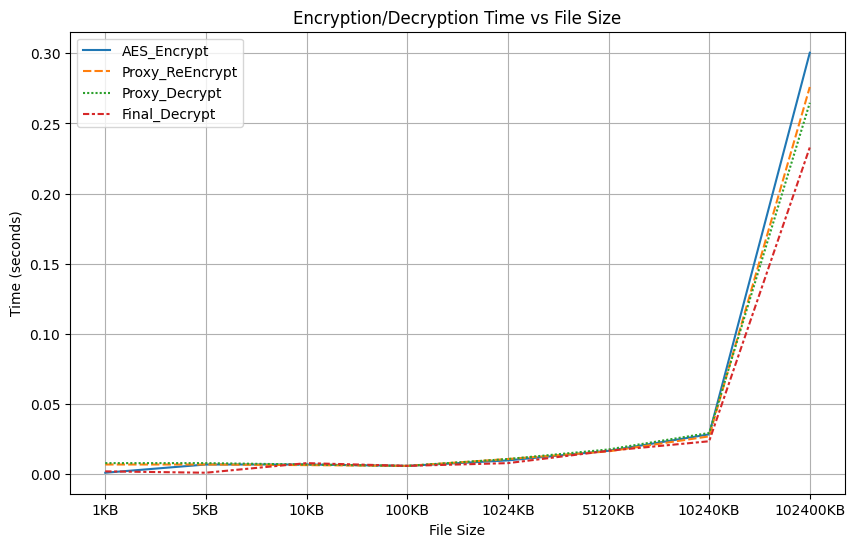

In [17]:
import time
from collections import defaultdict

benchmark_results = defaultdict(dict)

# Use this hashed_key from Step 2
# Ensure it’s defined before running the loop
# from your actual pipeline
# hashed_key = ...

for label, path in file_paths.items():
    print(f"\n🔄 Testing File: {label} — {path}")

    # STEP 4: AES Encrypt
    start = time.time()
    enc_info = encrypt_file_with_aes_gcm(path, hashed_key)
    benchmark_results[label]["AES_Encrypt"] = time.time() - start

    # STEP 5: Proxy Re-encryption
    proxy_key = hashed_key[::-1]
    start = time.time()
    proxy_enc_path = re_encrypt_file_with_proxy_key(enc_info['enc_path'], proxy_key)
    benchmark_results[label]["Proxy_ReEncrypt"] = time.time() - start

    # STEP 6: Bob decrypts proxy
    start = time.time()
    decrypted_proxy_path = decrypt_reencrypted_file_with_proxy_key(proxy_enc_path, proxy_key)
    benchmark_results[label]["Proxy_Decrypt"] = time.time() - start

    # STEP 7: Final decryption using hashed key
    start = time.time()
    final_path = final_decrypt_with_hashed_key(decrypted_proxy_path, hashed_key)
    benchmark_results[label]["Final_Decrypt"] = time.time() - start

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_benchmark = pd.DataFrame(benchmark_results).T
display(df_benchmark)

# Visualize
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_benchmark)
plt.title("Encryption/Decryption Time vs File Size")
plt.xlabel("File Size")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()